In [29]:
import pandas as pd
import plotly.express as px  # For Plotly Express, which is easy-to-use for quick visualizations
import plotly.graph_objects as go 

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

HOUSING RENTAL INCOME FORMATTING
---

In [32]:
housing = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=0)
housing.index = ['Housing'] * len(housing)
housing

,Unnamed: 0,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76


In [33]:
rental = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=1)
rental.index = ['Rental'] * len(rental)
rental

,Unnamed: 0,2019,2020,2021,2022,2023
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10


In [34]:
income = pd.read_excel("../data/raw/week_3_project_data.xlsx", sheet_name=2)
income.index = ['Income'] * len(income)
income

,Unnamed: 0,2019,2020,2021,2022,2023
Income,DE,26105,29896,29106,28569,30308
Income,FR,26210,25382,26075,26419,27577
Income,PT,11786,12696,13113,13148,14368


In [35]:
final_df = pd.concat([housing, rental, income], ignore_index=True)
index_labels = ['Housing'] * len(housing) + ['Rental'] * len(rental) + ['Income'] * len(income)
final_df.index = index_labels

In [36]:
final_df.rename(columns={"Unnamed: 0": "Country"}, inplace=True)
final_df

,Country,2019,2020,2021,2022,2023
Housing,DE,128.70,138.70,154.80,162.60,148.80
Housing,FR,110.86,116.62,123.98,131.82,131.26
Housing,PT,141.88,154.33,168.84,190.17,205.76
Rental,DE,100.67,101.06,101.92,102.60,104.78
Rental,FR,107.97,110.76,101.92,115.79,121.05
Rental,PT,106.10,107.60,109.00,110.80,113.10
Income,DE,26105.00,29896.00,29106.00,28569.00,30308.00
Income,FR,26210.00,25382.00,26075.00,26419.00,27577.00
Income,PT,11786.00,12696.00,13113.00,13148.00,14368.00


In [37]:
income_df = final_df[final_df.index == 'Income']
housing_df = final_df[final_df.index == "Housing"]
rental_df = final_df[final_df.index == "Rental"]

In [38]:
income_tidy = income_df.melt(id_vars="Country", var_name="Year", value_name="Income")
housing_tidy = housing_df.melt(id_vars="Country", var_name="Year", value_name="Housing")
rental_tidy = rental_df.melt(id_vars="Country", var_name="Year", value_name="Rental")

income_tidy

,Country,Year,Income
0,DE,2019,26105.0
1,FR,2019,26210.0
2,PT,2019,11786.0
3,DE,2020,29896.0
4,FR,2020,25382.0
5,PT,2020,12696.0
6,DE,2021,29106.0
7,FR,2021,26075.0
8,PT,2021,13113.0
9,DE,2022,28569.0


HOUSING RENTAL INCOME GRAPHS
---

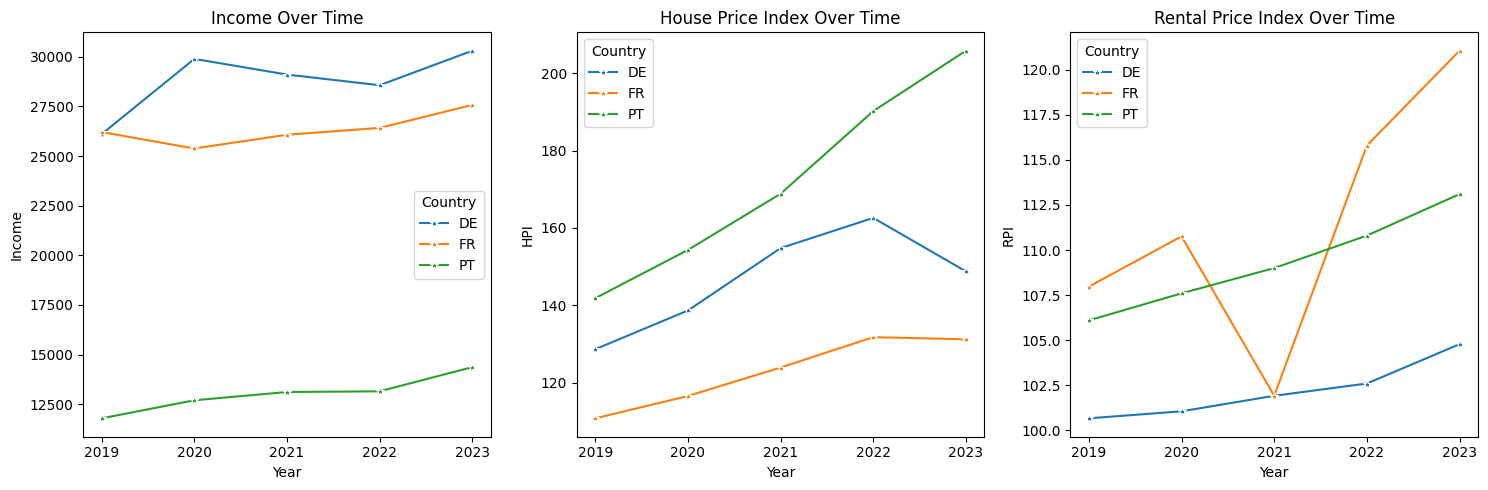

In [40]:
# Assuming income_tidy, housing_tidy, and rental_tidy are your original DataFrames

# Add a new column to each DataFrame to indicate the type of data
income_tidy['Type'] = 'Income'
housing_tidy['Type'] = 'Housing'
rental_tidy['Type'] = 'Rental'

# Concatenate the DataFrames into one long DataFrame
combined_data = pd.concat([income_tidy, housing_tidy, rental_tidy], axis=0)

# Create a figure and three subplots (axes), one for each graph
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the Income graph
sns.lineplot(data=income_tidy, x="Year", y="Income", hue="Country", marker="*", ax=axes[0])
axes[0].set_title('Income Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Income')
axes[0].legend(title='Country')

# Plot the Housing graph
sns.lineplot(data=housing_tidy, x="Year", y="Housing", hue="Country", marker="*", ax=axes[1])
axes[1].set_title('House Price Index Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('HPI')
axes[1].legend(title='Country')

# Plot the Rental graph
sns.lineplot(data=rental_tidy, x="Year", y="Rental", hue="Country", marker="*", ax=axes[2])
axes[2].set_title('Rental Price Index Over Time')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('RPI')
axes[2].legend(title='Country')

# Adjust the x-axis to only show whole years (no 0.5 steps)
for ax in axes:
    # Set x-axis ticks to only whole numbers (years)
    ax.set_xticks(range(int(min(combined_data['Year'])), int(max(combined_data['Year'])) + 1))

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

GERMANY, BERLIN
---

In [91]:
df_Cities = pd.read_excel("../data/raw/numbeo_stats.xlsx")
df_Cities.rename(columns = {"Unnamed: 0" : "Category"}, inplace = True)
# Fill missing 'Category' values using forward fill
df_Cities['Category'] = df_Cities["Category"].fillna(method = "ffill")

df_berlin = df_Cities[df_Cities['City'] == 'Berlin']
df_berlin = df_berlin.drop(7)

# Display the updated DataFrame
df_berlin

df_Countries = pd.read_excel("../data/raw/numbeo_stats.xlsx", sheet_name = 1)
df_Countries.rename(columns = {"Unnamed: 0" : "Category"}, inplace = True)
# Fill missing 'Category' values using forward fill
df_Countries['Category'] = df_Countries['Category'].fillna(method='ffill')
df_Countries.columns = df_Countries.columns.str.strip()

df_Germany = df_Countries[df_Countries["Country"] == 'DE']
df_Germany = df_Germany.drop(7)
# Display the updated DataFrame

print("df_Germany columns:", df_Germany.columns)
print("final_df columns:", final_df.columns)





df_Germany columns: Index(['Category', 'Country', '2019', '2020', '2021', '2022', '2023', '2024'], dtype='object')
final_df columns: Index(['Country', 2019, 2020, 2021, 2022, 2023], dtype='object')


C:\Users\manht\AppData\Local\Temp\ipykernel_11192\2125450288.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Cities['Category'] = df_Cities["Category"].fillna(method = "ffill")
C:\Users\manht\AppData\Local\Temp\ipykernel_11192\2125450288.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_Countries['Category'] = df_Countries['Category'].fillna(method='ffill')


In [95]:


# Print column names for debugging
print("df_Germany columns:", df_Germany.columns)
print("final_df columns:", final_df.columns)

# Ensure that the years columns are in string format
years = ['2019', '2020', '2021', '2022', '2023']

# 1. Prepare the data for the plots

# First plot: Income and Minimum Wage (from df_Germany)
income_de = df_Germany.loc[df_Germany['Category'] == 'Av salary (after tax)', years].values.flatten()
min_wage_de = df_Germany.loc[df_Germany['Category'] == 'Min wage (after tax)', years].values.flatten()

# Second plot: House Price Index (from final_df, for Germany)
housing_de = final_df.loc[final_df['Country'] == 'DE', years].values.flatten()

# Third plot: Rental Price Index (from final_df, for Germany)
rental_de = final_df.loc[final_df['Country'] == 'DE', years].values.flatten()

# Clean the column names if necessary
df_Germany.columns = df_Germany.columns.str.strip().astype(str)
final_df.columns = final_df.columns.str.strip().astype(str)

# After cleaning the columns, try running the plot code again


# 2. Normalize data for index (to make them comparable across years)
def normalize_data(data):
    return (data / data[0]) * 100  # Normalize to the first year (2019)

income_de_index = normalize_data(income_de)
min_wage_de_index = normalize_data(min_wage_de)
housing_de_index = normalize_data(housing_de)
rental_de_index = normalize_data(rental_de)

# 3. Create the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# First plot: Income and Minimum Wage
axes[0].plot(years, income_de_index, label='Income', color='blue', marker='o')
axes[0].plot(years, min_wage_de_index, label='Min Wage', color='orange', marker='o')
axes[0].set_title('Income and Minimum Wage Index')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Index (Base = 100 in 2019)')
axes[0].legend()

# Second plot: House Price Index
axes[1].plot(years, housing_de_index, label='House Price Index', color='green', marker='o')
axes[1].set_title('House Price Index')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Index (Base = 100 in 2019)')

# Third plot: Rental Price Index
axes[2].plot(years, rental_de_index, label='Rental Price Index', color='red', marker='o')
axes[2].set_title('Rental Price Index')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Index (Base = 100 in 2019)')

# Show the plots
plt.tight_layout()
plt.show()


df_Germany columns: Index(['Category', 'Country', '2019', '2020', '2021', '2022', '2023', '2024'], dtype='object')
final_df columns: Index(['Country', 2019, 2020, 2021, 2022, 2023], dtype='object')


KeyError: "None of [Index(['2019', '2020', '2021', '2022', '2023'], dtype='object')] are in the [columns]"